In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [4]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [5]:
df_sol = pd.read_excel("US12I1O_gradientboostingregressor_Solution_2.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.427745,0.001306,0.000000,0.000287,0.000287,0.000287,0.000287,0.000287,0.000287,0.000000,0.000000,0.000287,0.000287,0.001706
DMU 0002,0.615526,0.001221,0.000000,0.000419,0.000320,0.000000,0.000419,0.000320,0.000419,0.000000,0.000000,0.000320,0.000320,0.001651
DMU 0003,0.543690,0.001579,0.000000,0.000583,0.000000,0.000000,0.000583,0.000000,0.000583,0.000000,0.000000,0.000000,0.000460,0.001853
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.648628,0.001360,0.000000,0.000774,0.000000,0.000000,0.000774,0.000000,0.000774,0.000000,0.000000,0.000000,0.000000,0.001733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.557580,0.001970,0.000005,0.000482,0.000005,0.000005,0.000556,0.000005,0.000556,0.000005,0.000005,0.000005,0.000482,0.001997
DMU 0997,0.605462,0.001297,0.000000,0.000398,0.000258,0.000188,0.000398,0.000258,0.000398,0.000000,0.000000,0.000258,0.000258,0.001758
DMU 0998,0.568780,0.001396,0.000000,0.000628,0.000085,0.000085,0.000628,0.000085,0.000628,0.000000,0.000000,0.000085,0.000085,0.001774
DMU 0999,0.688266,0.001180,0.000000,0.000545,0.000000,0.000000,0.001180,0.000000,0.001142,0.000000,0.000000,0.000000,0.000000,0.001810


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-2dba39f4-0c34-4773-9420-7a62c4bf7ac5", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      879
Weight_Input 03       57
Weight_Input 04      286
Weight_Input 05      455
Weight_Input 06        1
Weight_Input 07      343
Weight_Input 08       18
Weight_Input 09      909
Weight_Input 10      620
Weight_Input 11      357
Weight_Input 12      229
Weight_Output 01       0
dtype: int64
Total :  4154


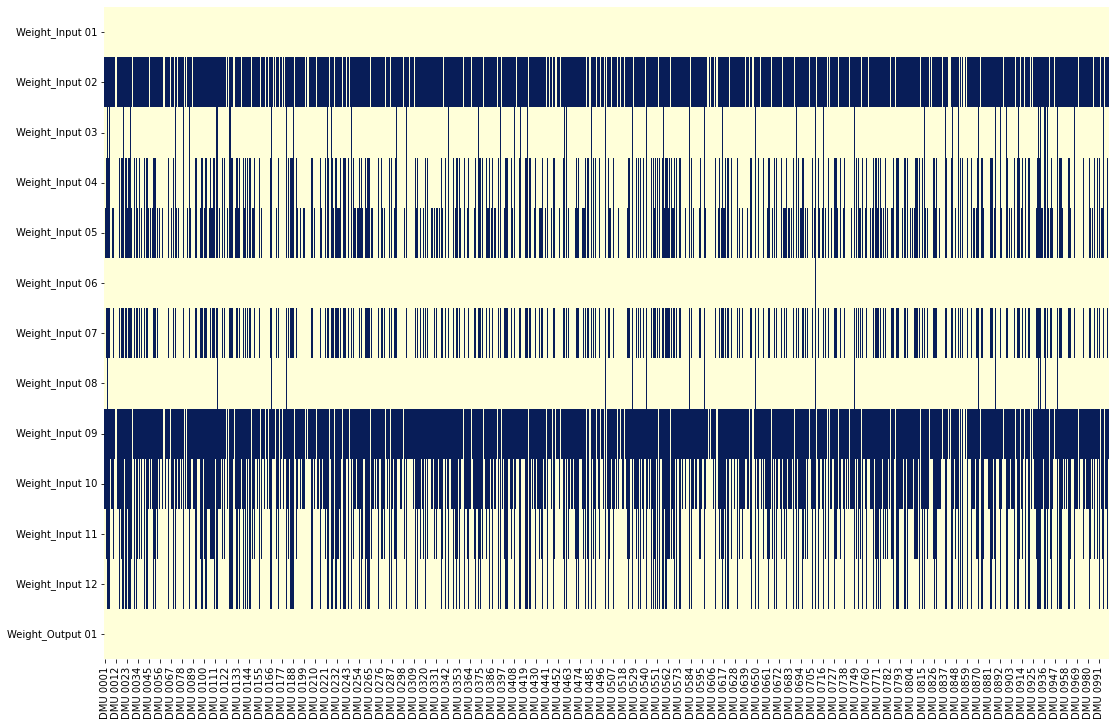

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

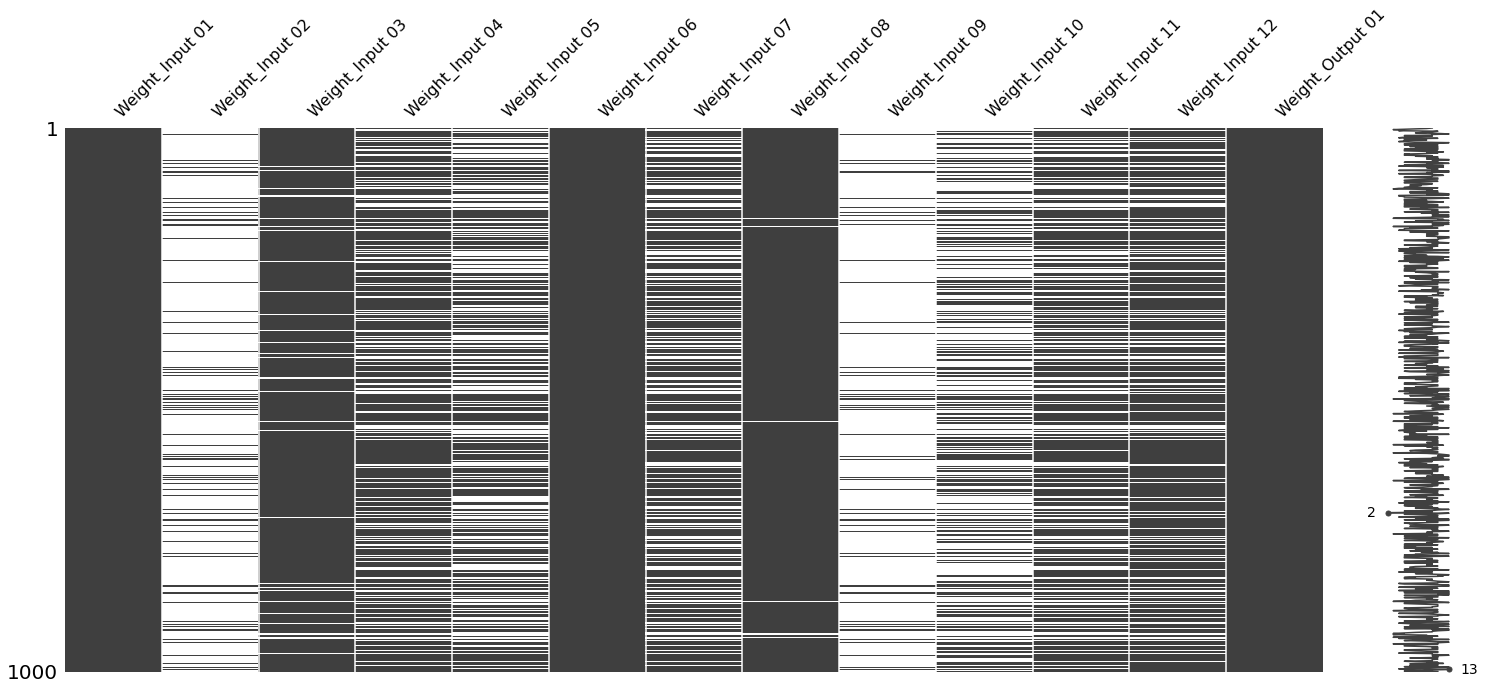

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [10]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        4.154000
std         2.838017
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        11.000000
dtype: float64

### DecisionTreeRegressor

In [11]:
df_dt = pd.read_excel("US12I1O_decisiontreeregressor_Solution_3.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.427745,0.001306,0.000000,0.000287,0.000287,0.000287,0.000287,0.000287,0.000287,0.0,0.0,0.000287,0.000287,0.001706
DMU 0002,0.620755,0.001096,0.000000,0.000329,0.000300,0.000329,0.000329,0.000329,0.000000,0.0,0.0,0.000329,0.000329,0.001666
DMU 0003,0.521322,0.001334,0.000000,0.000287,0.000285,0.000287,0.000419,0.000287,0.000000,0.0,0.0,0.000287,0.000287,0.001777
DMU 0004,0.798790,0.000879,0.000000,0.000000,0.000000,0.000879,0.000879,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.001726
DMU 0005,0.639750,0.001203,0.000000,0.000000,0.000000,0.000550,0.000651,0.000550,0.000000,0.0,0.0,0.000000,0.000000,0.001710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.527885,0.001627,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.0,0.0,0.000258,0.000258,0.001891
DMU 0997,0.603266,0.001162,0.000000,0.000339,0.000339,0.000339,0.000339,0.000339,0.000000,0.0,0.0,0.000339,0.000339,0.001751
DMU 0998,0.574000,0.001465,0.000000,0.000278,0.000000,0.000278,0.000637,0.000278,0.000000,0.0,0.0,0.000000,0.000278,0.001790
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.001758


In [12]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      785
Weight_Input 03      332
Weight_Input 04      404
Weight_Input 05       97
Weight_Input 06        1
Weight_Input 07      163
Weight_Input 08      496
Weight_Input 09      871
Weight_Input 10      927
Weight_Input 11      352
Weight_Input 12      318
Weight_Output 01       0
dtype: int64
Total :  4746


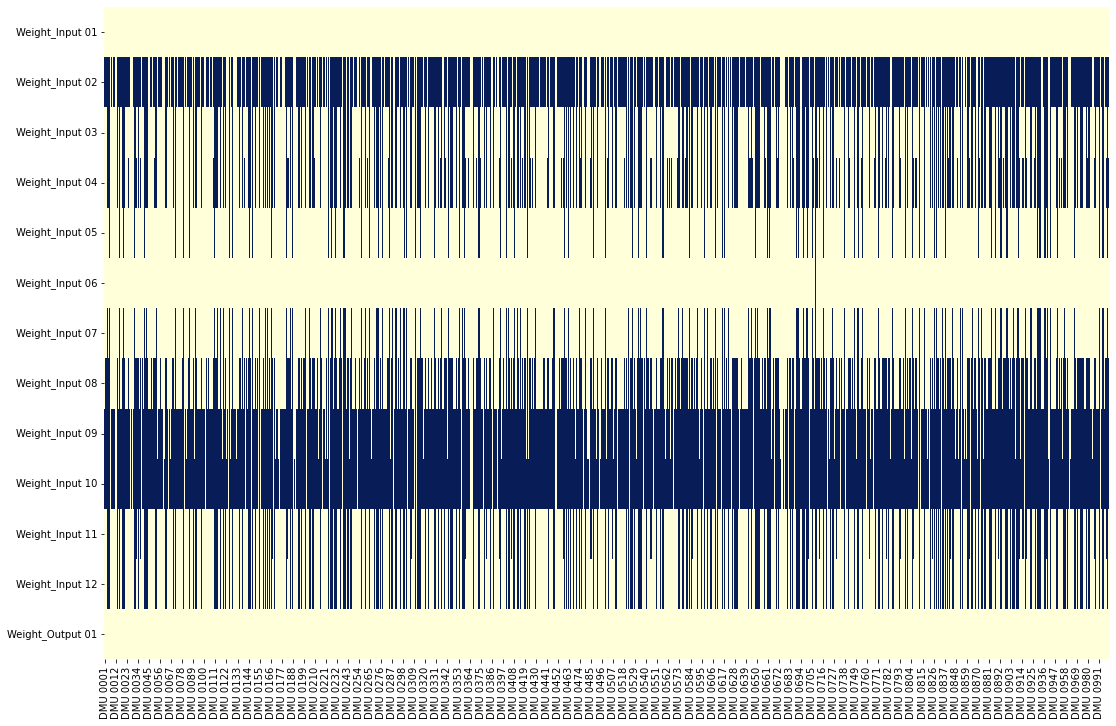

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [14]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4277,0.4277,0.0000,0.0000,True
DMU 0002,0.6155,0.6208,-0.0052,-0.8495,True
DMU 0003,0.5437,0.5213,0.0224,4.1140,True
DMU 0004,0.7348,0.7988,-0.0640,-8.7142,True
DMU 0005,0.6486,0.6397,0.0089,1.3688,True
...,...,...,...,...,...
DMU 0996,0.5576,0.5279,0.0297,5.3257,True
DMU 0997,0.6055,0.6033,0.0022,0.3627,True
DMU 0998,0.5688,0.5740,-0.0052,-0.9177,True
DMU 0999,0.6883,0.6683,0.0200,2.9025,True


In [15]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-65ba59b6-d740-439c-99d8-3588f62a07e3", "code": {"imports…

In [16]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  984
red :  16


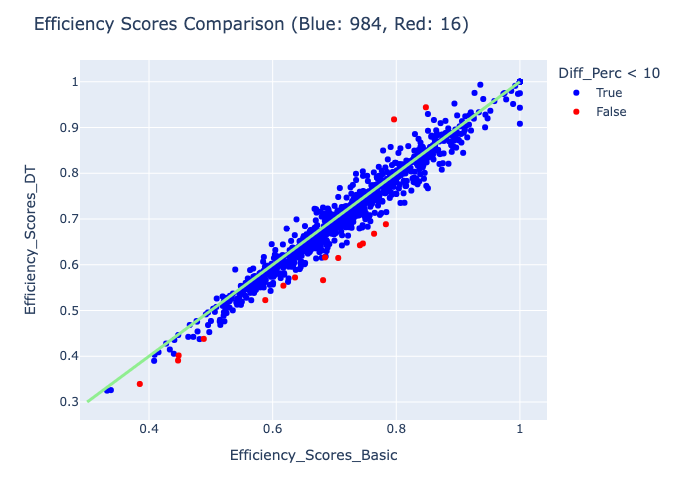

In [17]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [18]:
df_rf = pd.read_excel("US12I1O_randomforestregressor_Solution_3.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.428969,0.001307,0.0,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000000,0.000282,0.000282,0.001711
DMU 0002,0.614461,0.001057,0.0,0.000317,0.000317,0.000317,0.000317,0.000317,0.000000,0.000317,0.000000,0.000317,0.000317,0.001649
DMU 0003,0.522280,0.001533,0.0,0.000266,0.000266,0.000144,0.000545,0.000144,0.000144,0.000266,0.000000,0.000144,0.000144,0.001780
DMU 0004,0.746790,0.001540,0.0,0.000000,0.000000,0.000000,0.001022,0.000000,0.000000,0.001022,0.000000,0.000000,0.000000,0.001614
DMU 0005,0.650150,0.001477,0.0,0.000269,0.000269,0.000199,0.000567,0.000199,0.000000,0.000567,0.000000,0.000000,0.000000,0.001738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.524638,0.001432,0.0,0.000258,0.000258,0.000258,0.000466,0.000258,0.000258,0.000258,0.000000,0.000258,0.000258,0.001879
DMU 0997,0.603930,0.001268,0.0,0.000376,0.000376,0.000215,0.000376,0.000215,0.000215,0.000376,0.000000,0.000215,0.000215,0.001753
DMU 0998,0.575017,0.001546,0.0,0.000279,0.000279,0.000279,0.000610,0.000000,0.000000,0.000279,0.000000,0.000000,0.000000,0.001793
DMU 0999,0.668289,0.001535,0.0,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [19]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      859
Weight_Input 03      106
Weight_Input 04       91
Weight_Input 05      215
Weight_Input 06        1
Weight_Input 07      292
Weight_Input 08      556
Weight_Input 09       49
Weight_Input 10      700
Weight_Input 11      500
Weight_Input 12      482
Weight_Output 01       0
dtype: int64
Total :  3851


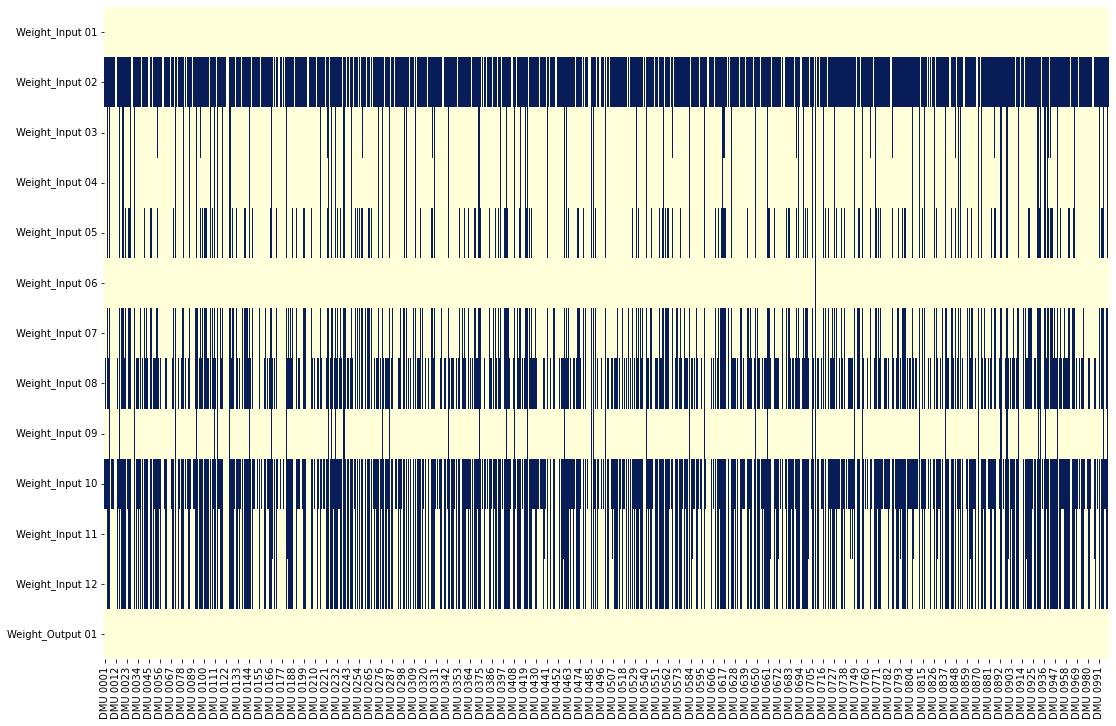

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [21]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4277,0.4290,-0.0012,-0.2860,True
DMU 0002,0.6155,0.6145,0.0011,0.1731,True
DMU 0003,0.5437,0.5223,0.0214,3.9378,True
DMU 0004,0.7348,0.7468,-0.0120,-1.6371,True
DMU 0005,0.6486,0.6501,-0.0015,-0.2346,True
...,...,...,...,...,...
DMU 0996,0.5576,0.5246,0.0329,5.9080,True
DMU 0997,0.6055,0.6039,0.0015,0.2529,True
DMU 0998,0.5688,0.5750,-0.0062,-1.0966,True
DMU 0999,0.6883,0.6683,0.0200,2.9025,True


In [22]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-6aa3b11a-e8ac-4a96-9af8-686e17e8c737", "code": {"imports…

In [23]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  998
red :  2


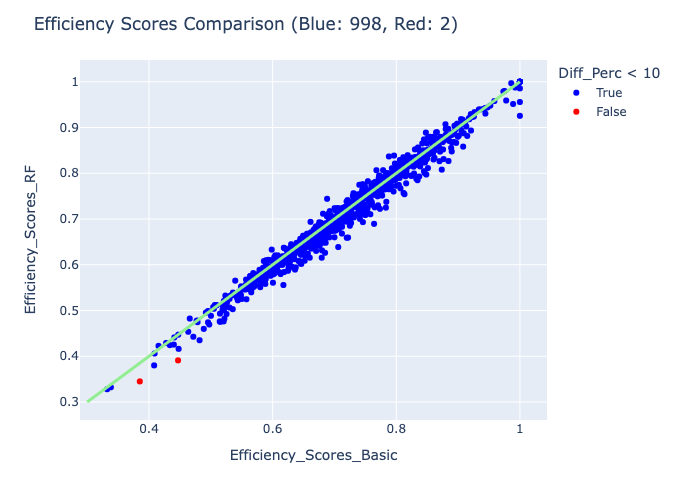

In [24]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [25]:
df_gb = pd.read_excel("US12I1O_gradientboostingregressor_Solution_3.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.428969,0.001307,0.0,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000000,0.000282,0.000282,0.001711
DMU 0002,0.613282,0.001188,0.0,0.000392,0.000392,0.000141,0.000392,0.000141,0.000141,0.000000,0.000000,0.000141,0.000392,0.001645
DMU 0003,0.528545,0.001647,0.0,0.000296,0.000296,0.000000,0.000609,0.000000,0.000296,0.000000,0.000000,0.000000,0.000296,0.001801
DMU 0004,0.734761,0.001506,0.0,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.635317,0.001534,0.0,0.000090,0.000445,0.000090,0.000551,0.000090,0.000090,0.000090,0.000035,0.000090,0.000090,0.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.531289,0.002007,0.0,0.000379,0.000379,0.000000,0.000379,0.000000,0.000379,0.000000,0.000000,0.000000,0.000379,0.001903
DMU 0997,0.599461,0.001257,0.0,0.000415,0.000415,0.000149,0.000415,0.000149,0.000149,0.000000,0.000000,0.000149,0.000415,0.001740
DMU 0998,0.565286,0.001541,0.0,0.000251,0.000251,0.000138,0.000551,0.000138,0.000138,0.000000,0.000000,0.000000,0.000251,0.001763
DMU 0999,0.668289,0.001535,0.0,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [26]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      861
Weight_Input 03      126
Weight_Input 04       86
Weight_Input 05      239
Weight_Input 06        1
Weight_Input 07      278
Weight_Input 08      137
Weight_Input 09      425
Weight_Input 10      554
Weight_Input 11      307
Weight_Input 12      124
Weight_Output 01       0
dtype: int64
Total :  3138


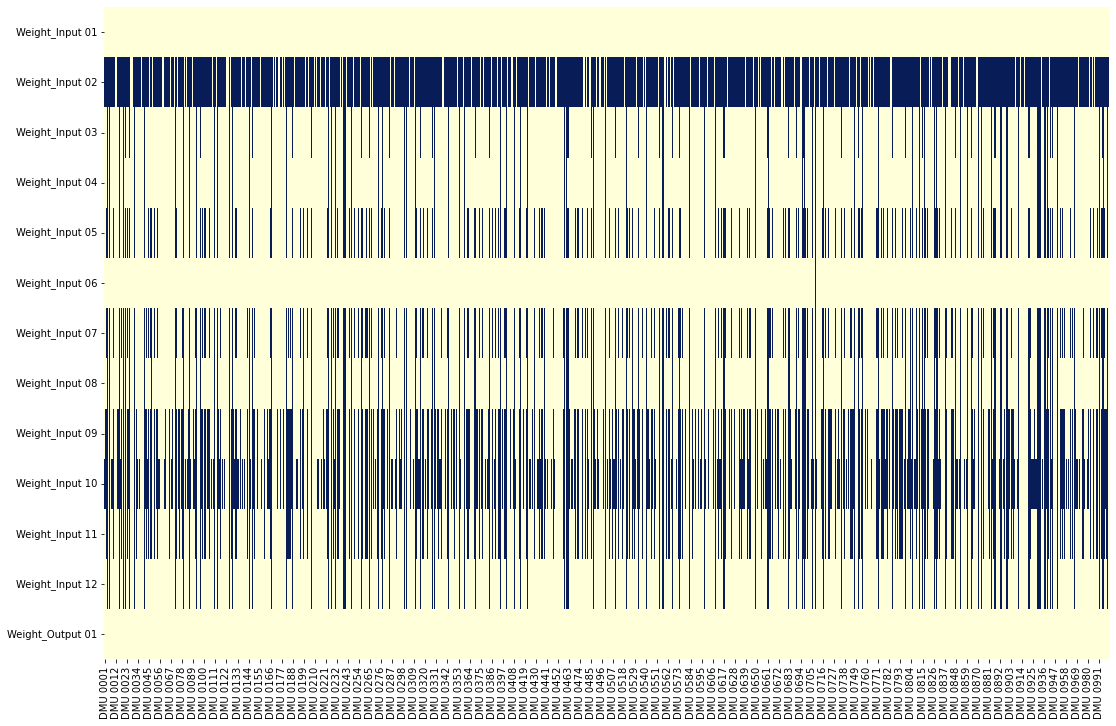

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [28]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4277,0.4290,-0.0012,-0.2860,True
DMU 0002,0.6155,0.6133,0.0022,0.3647,True
DMU 0003,0.5437,0.5285,0.0151,2.7855,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6486,0.6353,0.0133,2.0521,True
...,...,...,...,...,...
DMU 0996,0.5576,0.5313,0.0263,4.7153,True
DMU 0997,0.6055,0.5995,0.0060,0.9911,True
DMU 0998,0.5688,0.5653,0.0035,0.6143,True
DMU 0999,0.6883,0.6683,0.0200,2.9025,True


In [29]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-e4feba9c-fe20-4c69-b655-b978fd36424e", "code": {"imports…

In [30]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  991
red :  9


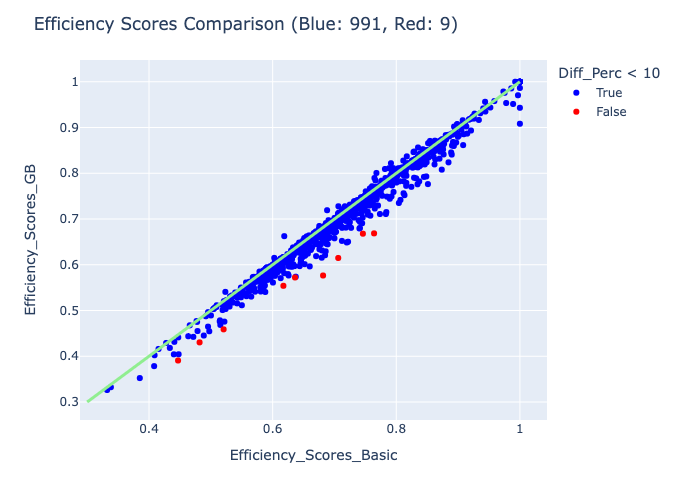

In [31]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [32]:
df_xgb = pd.read_excel("US12I1O_xgbregressor_Solution_3.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.408766,0.001323,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.001630
DMU 0002,0.585619,0.001269,0.000184,0.000184,0.000054,0.000054,0.000442,0.000184,0.000184,0.000184,0.000184,0.000184,0.000184,0.001571
DMU 0003,0.505554,0.001513,0.000152,0.000152,0.000152,0.000018,0.000558,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.001723
DMU 0004,0.745406,0.001225,0.000000,0.000000,0.000000,0.000000,0.000919,0.000000,0.000406,0.000406,0.000406,0.000000,0.000000,0.001611
DMU 0005,0.628661,0.001590,0.000000,0.000000,0.000000,0.000000,0.001278,0.000000,0.000012,0.000012,0.000012,0.000000,0.000000,0.001680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.551376,0.001807,0.000177,0.000000,0.000000,0.000000,0.000705,0.000000,0.000705,0.000705,0.000177,0.000000,0.000177,0.001975
DMU 0997,0.570172,0.001267,0.000167,0.000167,0.000167,0.000167,0.000414,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.001655
DMU 0998,0.540263,0.001451,0.000121,0.000121,0.000121,0.000121,0.000575,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121,0.001685
DMU 0999,0.684471,0.001388,0.000000,0.000000,0.000000,0.000000,0.001388,0.000000,0.000932,0.000000,0.000000,0.000000,0.000000,0.001800


In [33]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      198
Weight_Input 03      267
Weight_Input 04      359
Weight_Input 05      550
Weight_Input 06        1
Weight_Input 07      233
Weight_Input 08       29
Weight_Input 09       90
Weight_Input 10      127
Weight_Input 11      222
Weight_Input 12      157
Weight_Output 01       0
dtype: int64
Total :  2233


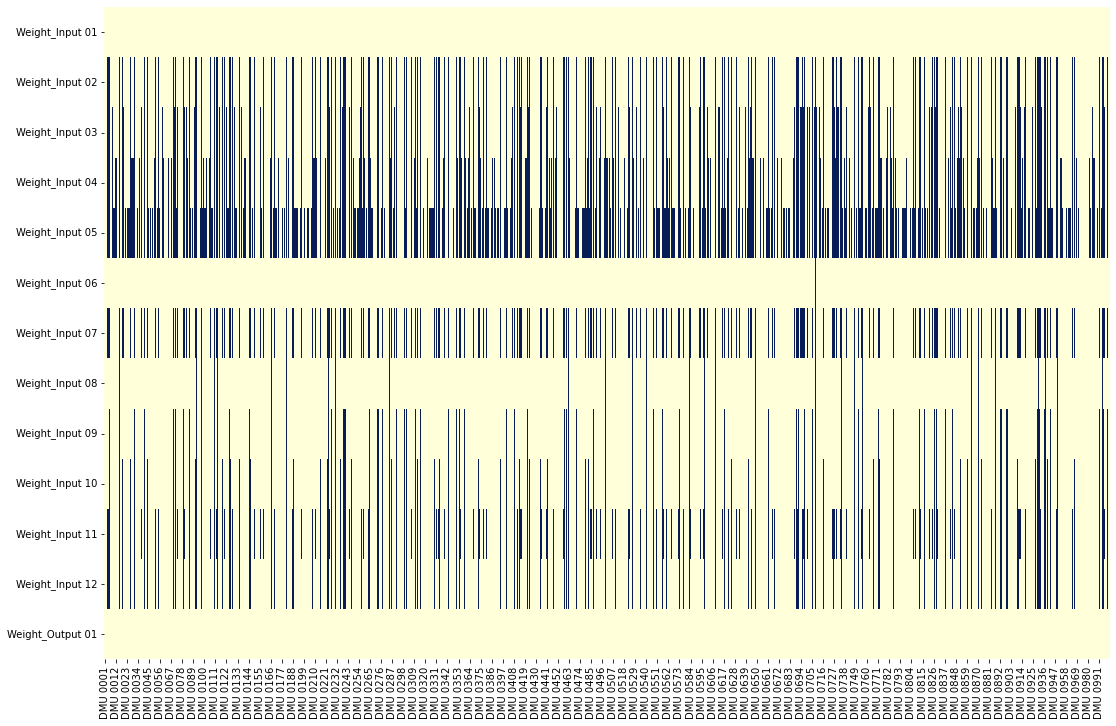

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [35]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4277,0.4088,0.0190,4.4370,True
DMU 0002,0.6155,0.5856,0.0299,4.8589,True
DMU 0003,0.5437,0.5056,0.0381,7.0141,True
DMU 0004,0.7348,0.7454,-0.0106,-1.4488,True
DMU 0005,0.6486,0.6287,0.0200,3.0784,True
...,...,...,...,...,...
DMU 0996,0.5576,0.5514,0.0062,1.1127,True
DMU 0997,0.6055,0.5702,0.0353,5.8285,True
DMU 0998,0.5688,0.5403,0.0285,5.0136,True
DMU 0999,0.6883,0.6845,0.0038,0.5514,True


In [36]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-97bc5bf7-ecfe-4c70-b109-759758cd4ef5", "code": {"imports…

In [37]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  996
red :  4


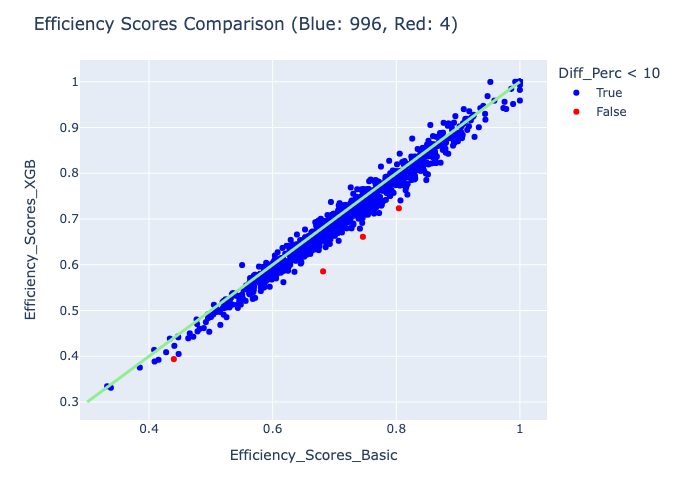

In [38]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()